In [34]:
from typing import List 
import string

import pandas as pd
import numpy as np
import statistics as stats
import math 
import jsonpickle

import collections
import copy


In [64]:
def black_scholes_price(S, K, t, r, sigma, option_type='call'):
    t = t/365
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    if option_type == 'call':
        price = S * stats.NormalDist().cdf(d1) - K * np.exp(-r * t) * stats.NormalDist().cdf(d2)
    else:
        price = K * np.exp(-r * t) * stats.NormalDist().cdf(-d2) - S * stats.NormalDist().cdf(-d1)
    return price

In [94]:
import numpy as np
import statistics as stats
import math

def black_scholes_price(S, K, t_days, r, sigma, option_type='call'):
    t_years = t_days / 365.0  # Convert days to years
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * t_years) / (sigma * math.sqrt(t_years))
    d2 = d1 - sigma * math.sqrt(t_years)
    if option_type == 'call':
        price = S * stats.NormalDist().cdf(d1) - K * math.exp(-r * t_years) * stats.NormalDist().cdf(d2)
    else:
        price = K * math.exp(-r * t_years) * stats.NormalDist().cdf(-d2) - S * stats.NormalDist().cdf(-d1)
    return price


In [115]:
black_scholes_price(10000,10000,250,0,0.19333, option_type='put') #637.63

637.6316016474993

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

prices_path_0 = r'D:/Projects/IMC_Challenge/Round_4/data/prices_round_4_day_1.csv'
prices_path_1 = r'D:/Projects/IMC_Challenge/Round_4/data/prices_round_4_day_2.csv'
prices_path_2 = r'D:/Projects/IMC_Challenge/Round_4/data/prices_round_4_day_3.csv'

df_0 = pd.read_csv(prices_path_0, sep=";")
df_1 = pd.read_csv(prices_path_1, sep=";")
df_2 = pd.read_csv(prices_path_2, sep=";")



merged = pd.concat([df_0,df_1,df_2], axis=0)
merged = merged.fillna(0) 
merged = merged.drop(['day','timestamp'], axis=1)
merged['mid_price'] = (merged['ask_price_1']+merged['bid_price_1'])/2

df_coc = merged.loc[merged["product"] == "COCONUT"]
df_coc.index = np.arange(1,30001)

df_coup = merged.loc[merged["product"] == "COCONUT_COUPON"]
df_coup.index = np.arange(1,30001)

df_coup['synthetic'] = df_coc['mid_price'].apply(lambda x: black_scholes_price(x,10000,249,0,0.1933)) 
df_coup['synth_ask'] = df_coc['ask_price_1'].apply(lambda x: black_scholes_price(x,10000,249,0,0.1933)) 
df_coup['synth_bid'] = df_coc['bid_price_1'].apply(lambda x: black_scholes_price(x,10000,249,0,0.1933)) 


#merged.index = np.arange(1,30004)

# df_1['ORCHIDS_diff'] = df_1.ORCHIDS.diff(3)
# df_1['ORCHIDS_rolling10'] = df_1['ORCHIDS'].rolling(10).mean()
# df_1['ORCHIDS_rolling20'] = df_1['ORCHIDS'].rolling(20).mean()

# df_1['HUMIDITY_rolling20'] = df_1['HUMIDITY'].rolling(10).mean()
# df_1['HUMIDITY_rolling20_sq'] = df_1['HUMIDITY'].rolling(10).mean()**2
# df_1['HUMIDITY_rolling20_cb'] = df_1['HUMIDITY'].rolling(10).mean()**3
# df_1['HUMIDITY_rolling20_fth'] = df_1['HUMIDITY'].rolling(10).mean()**4

# df_1['SUNLIGHT_rolling20'] = df_1['SUNLIGHT'].rolling(10).mean()
# df_1['SUNLIGHT_rolling20_sq'] = df_1['SUNLIGHT'].rolling(10).mean()**2
# df_1['SUNLIGHT_rolling20_cb'] = df_1['SUNLIGHT'].rolling(10).mean()**3
# df_1['SUNLIGHT_rolling20_fth'] = df_1['SUNLIGHT'].rolling(10).mean()**4

# df_1['SUN_HUM']=df_1['HUMIDITY']*df_1['SUNLIGHT']


# print(merged.shape)
# print(merged.keys())
# print(merged.describe())
# print(merged.corr())

C:\Users\reves\AppData\Local\Temp\ipykernel_32080\935611650.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coup['synthetic'] = df_coc['mid_price'].apply(lambda x: black_scholes_price(x,10000,249,0,0.1933))
C:\Users\reves\AppData\Local\Temp\ipykernel_32080\935611650.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_coup['synth_ask'] = df_coc['ask_price_1'].apply(lambda x: black_scholes_price(x,10000,249,0,0.1933))
C:\Users\reves\AppData\Local\Temp\ipykernel_32080\935611650.py:28: SettingWithCo

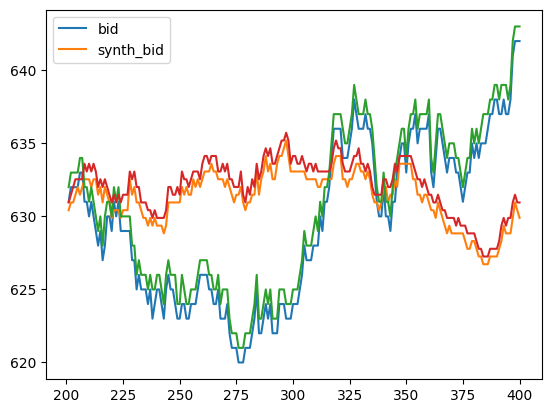

In [125]:
plt.plot(df_coup['bid_price_1'][200:400],label='bid')
plt.plot(df_coup['synth_bid'][200:400],label='synth_bid')
plt.plot(df_coup['ask_price_1'][200:400])
plt.plot(df_coup['synth_ask'][200:400])
plt.legend()
#plt.plot(df_coc['mid_price'])